# HR Analytics : Predicting Employee Churn
- DataCamp의 교육 요약

## 1. Dataset

분석할 데이터셋을 불러와서 기본 정보들을 파악한다 : turnover.csv

In [1]:
import pandas as pd
data = pd.read_csv("turnover.csv")

In [ ]:
# 데이터셋의 메타 정보를 확인한다.

data.info()

In [30]:
# 데이터셋의 헤드정보와 샘플 데이터를 보여준다.
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [ ]:
# 급여정보(salary)는 카테고리로 되어 있다.
# 어떤 카테고리들로 구성되어 있는지 확인한다.

data.salary.unique()

## 2. Transforming categorical	variables

### Categorical	variables의 종류 

1) Ordinal - 순서 또는 순위를 매길 수 있는 2개 이상의 카테고리로 된 변수 
   예) salary 
    Values : low, medium,	high 

2) Nominal - 순서가 없는 2개 이상의 카테고리로 된 변수 

   예) department 
   
       Values: sales, accounting, hr, technical, support, management, IT, product_mng, marketing, RandD

#### ordinal category로 변환

In [2]:
# Encoding categories : astype
# 'salary'컬럼의 데이터 유형을 카테고리로 바꾸기

data.salary = data.salary.astype('category')

In [3]:
# 카테고리의 순서 지정하기 : cat.reorder_categories

data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

In [4]:
# 카테고리의 값을 숫자(integer) 형태로 바꾸기 : cat.codes

data.salary = data.salary.cat.codes

In [5]:
data.salary.unique()

array([0, 1, 2], dtype=int64)

위의 카테고리 변환과정을 거처 salary의 값은 아래와 같이 변한다.

변환 전       변환 후
-------       -------
low           0
medium        1
hig           2

#### nominal category로 변환
nominal category로 변환하려면 dummy 변수를 사용함
- dummy 변수 : 0과 1의 값만 갖는 변수

In [42]:
# dummy 변수를 가져와서 새로운 DataFrame 안에 저장 : get_dummies
# 여기서는 departments라는 dummy 변수를 생성 
# 즉, 부서명이 별도의 컬럼이 되는 새로운 DataFrame이 생성됨 -> 직원은 자신의 부서(department)에 해당하는 컬럼은 '1', 나머지는 '0'

departments = pd.get_dummies(data.department)

In [43]:
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


<<dummy trap>>
departments라는 새로운 DataFrame에는 10개의 컬럼(부서명)이 만들어졌다.
그러나 0,1의 값으로 10개의 부서를 표현하려면 9개의 컬럼만으로 충분하므로 컬럼 하나는 불필요하다.

1) departments 컬럼 중 하나를 제거하고
2) 더 이상 사용하지 않을 department 컬럼도 제거하고
3) 새로 만들어진 departments라는 dataframe을 기존의 employee dataset과 결합한다.

In [45]:
# 1) departments 컬럼 중 하나를 제거
#    dummy 변수를 처음 만들 때 첫번째 변수값을 자동으로 삭제할 수 있다 : drop_first = True
#    예) departments = pd.get_dummies(data.department, drop_first=Trud)
#    여기서는 맨 뒤의 컬럼("technical")을 제거 --> 이 경우 [0,0,0,0,0,0,0,0,0]이면 "technical" 부서가 됨

departments = departments.drop("technical", axis=1)

In [46]:
# 2) employee dataframe에 있는 department 컬럼은 이제는 안쓰니 삭제한다.

data = data.drop("department", axis=1)

In [47]:
# 3) 이제 새로 만든 departments를 기존의 employee dataset과 결합한다.

data = data.join(departments)

In [ ]:
data.head()

## 3. 기술적 통계(descriptive statistics)

앞에서 데이터를 정제하였으니 이제는 간단한 통계정보를 확인한다.

### Turnover rate (퇴직율)

In [6]:
# 전체 직원 수를 구한다.
n_employees = len(data)

# 퇴직 또는 재직 중인 직원 수를 구한다.
# 0 -> 재직, 1 -> 퇴직

print(data.left.value_counts())

0    11428
1     3571
Name: left, dtype: int64


In [7]:
# 재직 또는 퇴직 직언의 비율을 구한다.

print(data.left.value_counts() / n_employees * 100)

0    76.191746
1    23.808254
Name: left, dtype: float64


### Correlations (상관관계)

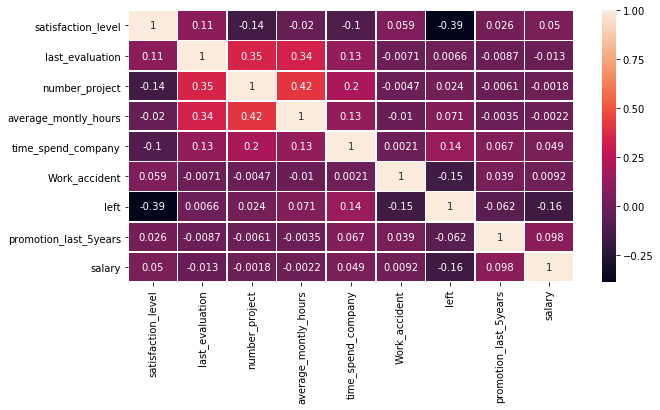

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, annot=True, linewidths=.5)
plt.show()

### Salary by occupation

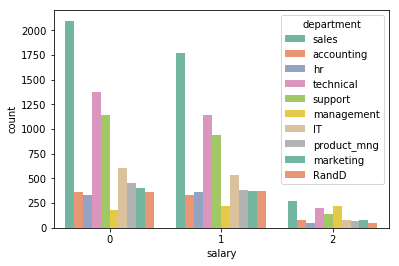

In [40]:
sns.countplot(x='salary', hue='department', data=data, palette='Set2')
plt.figure(figsize = (50,10))
plt.show()